In [22]:
# necessary imports for simulations
import gym_donkeycar
import gym
import numpy
import cv2
from stable_baselines3 import PPO, DQN, SAC
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# setting up DonkeySim environment
env = gym.make("donkey-mountain-track-v0")
#env = gym.make("donkey-warren-track-v0")
#env = gym.make("donkey-waveshare-track-v0")

INFO:gym_donkeycar.core.client:connecting to localhost:9091 
/Users/anshbhatnagar/miniconda3/lib/python3.12/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


starting DonkeyGym env
Setting default: start_delay 5.0
Setting default: max_cte 8.0
Setting default: frame_skip 1
Setting default: cam_resolution (120, 160, 3)
Setting default: log_level 20
Setting default: host localhost
Setting default: port 9091
Setting default: steer_limit 1.0
Setting default: throttle_min 0.0
Setting default: throttle_max 1.0
loading scene mountain_track


INFO:gym_donkeycar.envs.donkey_sim:on need car config
INFO:gym_donkeycar.envs.donkey_sim:sending car config.
INFO:gym_donkeycar.envs.donkey_sim:sim started!


Exception: [Errno 54] Connection reset by peer


In [24]:
# resetting enviornment, and testing manual steps
obs = env.reset()
obs, reward, done, info = env.step([0.0, 1.0])

/Users/anshbhatnagar/miniconda3/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/Users/anshbhatnagar/miniconda3/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
/Users/anshbhatnagar/miniconda3/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'numpy.ndarray'>`
  logger.warn(
/Users/anshbhatnagar/miniconda3/lib/python3.12/site-packages/gym/utils/passive_env_c

AttributeError: module 'numpy' has no attribute 'bool8'

In [25]:
obs = env.reset()

In [26]:
model = PPO("CnnPolicy", env, verbose=1)

# Get the policy action from an observation (and optional hidden state)
for i in range(1000):
    action, i = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    print(f"Obs: {obs.shape}")
    print(f"Reward: {reward}")
    print(f"Done?: {done}")
    print(f"Info: {info}")
    if done:
        obs = env.reset()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


/Users/anshbhatnagar/miniconda3/lib/python3.12/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/Users/anshbhatnagar/miniconda3/lib/python3.12/site-packages/stable_baselines3/common/utils.py:486: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_numpy.cpp:209.)
  return th.as_tensor(obs, device=device)


Obs: (120, 160, 3)
Reward: 8.166891903470933e-05
Done?: False
Info: {'pos': (6.26467180252075, 0.654577851295471, 6.39525651931763), 'cte': 3.5412073135376, 'speed': 0.000147183178341948, 'forward_vel': np.float64(0.00014653100025514813), 'hit': 'none', 'gyro': (1.94832682609558e-06, -9.04640182852745e-06, -3.13983764499426e-06), 'accel': (9.22308609005995e-05, 0.000128038343973458, 2.54949554800987e-06), 'vel': (-1.3781042980554e-05, -2.13539078686154e-06, 0.000146521022543311), 'lidar': [], 'car': (0.14875827729702, 1.63689410686493, 179.664047241211), 'last_lap_time': 0.0, 'lap_count': 0}
Obs: (120, 160, 3)
Reward: 8.184574032911134e-05
Done?: False
Info: {'pos': (6.26467180252075, 0.654577672481537, 6.39524936676025), 'cte': 3.54120802879334, 'speed': 0.000146509148180485, 'forward_vel': np.float64(0.00014684827793293411), 'hit': 'none', 'gyro': (1.89496204257011e-05, -8.2115875557065e-06, 3.01707768812776e-05), 'accel': (0.000106704283098225, -0.000309480325086042, 3.3783726394176

In [27]:
# PPO is model-free on-policy algorithm, which is fast to run but sample inefficient
model = PPO("CnnPolicy", env, n_steps=256, verbose=1)
model.learn(10000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


/Users/anshbhatnagar/miniconda3/lib/python3.12/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 83.7     |
|    ep_rew_mean     | 46.3     |
| time/              |          |
|    fps             | 14       |
|    iterations      | 1        |
|    time_elapsed    | 17       |
|    total_timesteps | 256      |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 66.8        |
|    ep_rew_mean          | 36.4        |
| time/                   |             |
|    fps                  | 13          |
|    iterations           | 2           |
|    time_elapsed         | 37          |
|    total_timesteps      | 512         |
| train/                  |             |
|    approx_kl            | 0.017863583 |
|    clip_fraction        | 0.133       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.83       |
|    explained_variance   | 0.0228      |
|    learning_rate        | 0.

INFO:gym_donkeycar.envs.donkey_sim:New lap time: 3.01 seconds
INFO:gym_donkeycar.envs.donkey_sim:New lap time: 1.27 seconds
INFO:gym_donkeycar.envs.donkey_sim:New lap time: 2.33 seconds
INFO:gym_donkeycar.envs.donkey_sim:New lap time: 1.8 seconds
Exception in thread Thread-132 (proc_msg):
Traceback (most recent call last):
  File "/Users/anshbhatnagar/miniconda3/lib/python3.12/site-packages/gym_donkeycar/core/client.py", line 101, in proc_msg
    data = s.recv(1024 * 256)
           ^^^^^^^^^^^^^^^^^^
ConnectionResetError: [Errno 54] Connection reset by peer

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/anshbhatnagar/miniconda3/lib/python3.12/threading.py", line 1075, in _bootstrap_inner
    self.run()
  File "/Users/anshbhatnagar/miniconda3/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "/Users/anshbhatnagar/miniconda3/lib/python3.12/threading

In [31]:
# SAC
#model = SAC("CnnPolicy", env, verbose=1)
#model.learn(10000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


/Users/anshbhatnagar/miniconda3/lib/python3.12/site-packages/stable_baselines3/common/buffers.py:242: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 115.22GB > 5.13GB
  warnings.warn(


INFO:gym_donkeycar.envs.donkey_sim:New lap time: 1.17 seconds
INFO:gym_donkeycar.envs.donkey_sim:New lap time: 0.03 seconds
INFO:gym_donkeycar.envs.donkey_sim:New lap time: 0.88 seconds
INFO:gym_donkeycar.envs.donkey_sim:New lap time: 0.9 seconds
INFO:gym_donkeycar.envs.donkey_sim:New lap time: 1.02 seconds
INFO:gym_donkeycar.envs.donkey_sim:New lap time: 2.4 seconds
INFO:gym_donkeycar.envs.donkey_sim:New lap time: 0.99 seconds


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.2     |
|    ep_rew_mean     | 21.6     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 4        |
|    time_elapsed    | 24       |
|    total_timesteps | 109      |
| train/             |          |
|    actor_loss      | -4.13    |
|    critic_loss     | 0.782    |
|    ent_coef        | 0.998    |
|    ent_coef_loss   | -0.00706 |
|    learning_rate   | 0.0003   |
|    n_updates       | 8        |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 14.9     |
|    ep_rew_mean     | 10.5     |
| time/              |          |
|    episodes        | 8        |
|    fps             | 2        |
|    time_elapsed    | 45       |
|    total_timesteps | 119      |
| train/             |          |
|    actor_loss      | -2.97    |
|    critic_loss     | 1.12     |
|    ent_coef 

Text(0, 0.5, 'Mean Episode Reward')

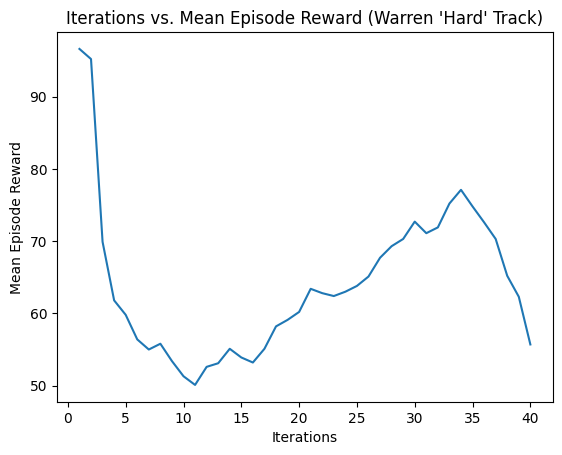

In [30]:
# read warren track reward data as a csv
warren_data = pd.read_csv("data/warren-reward.csv")
warren_data = warren_data.set_index("iterations")

plt.plot(warren_data)
plt.title("Iterations vs. Mean Episode Reward (Warren 'Hard' Track)")
plt.xlabel("Iterations")
plt.ylabel("Mean Episode Reward")

Text(0, 0.5, 'Mean Episode Reward')

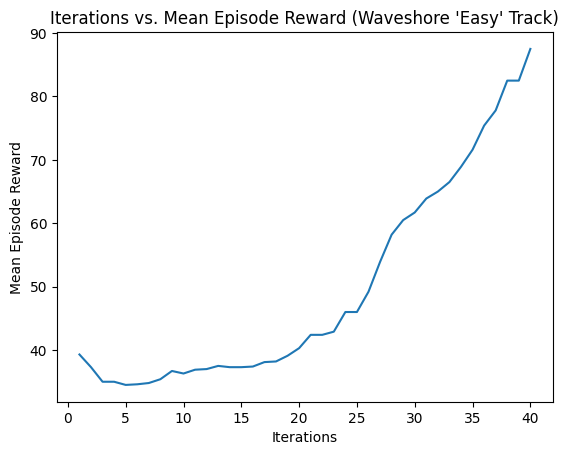

In [31]:
# read waveshore track reward data as a csv
waveshore_data = pd.read_csv("data/waveshore-reward.csv")
waveshore_data = waveshore_data.set_index("iterations")

plt.plot(waveshore_data)
plt.title("Iterations vs. Mean Episode Reward (Waveshore 'Easy' Track)")
plt.xlabel("Iterations")
plt.ylabel("Mean Episode Reward")

Text(0, 0.5, 'Mean Episode Reward')

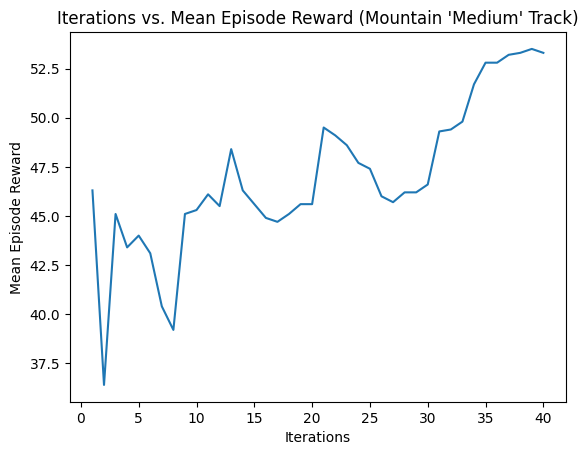

In [32]:
# read mountain track reward data as a csv
mountain_data = pd.read_csv("data/mountain-reward.csv")
mountain_data = mountain_data.set_index("iterations")

plt.plot(mountain_data)
plt.title("Iterations vs. Mean Episode Reward (Mountain 'Medium' Track)")
plt.xlabel("Iterations")
plt.ylabel("Mean Episode Reward")